## IBM Capstone Project Report 

A full report consisting of all of the following components (15 marks):  
Introduction where you discuss the business problem and who would be interested in this project.  
Data where you describe the data that will be used to solve the problem and the source of the data.  
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.

2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

### Introduction:  
In the globalized world today, it is exceptionally valuable to have international work experience. Most young adults like myself in Singapore would have considered moving overseas for opportunities to major cities such as Toronto or New York. However, such cities can have a high cost of living. For the purpose of this project, we will be picking New York City to determine its quality of life there should we decide to work there.

My target audience will be anyone interested to work in New York City and rent a place there.The information is useful for anyone who wish to work in New York City even though I talked about young adults.

There are 2 factors that we should consider for working in New York City. 
1. The cost of living (essentially average apartment rent in Brooklyn & Manhattan)
2. Attractiveness of the neighborhood (top venues analysis)

We will use unsupervised machine learning (k-means clustering) to answer this question

## Type and sources of the datasets

The datasets required for this project are: 
- Data about Borough and Neighborhood in New York City
- Data about the location information (Latitude and Longitude of Borough and Neighborhood in NYC)
- Data about average apartment rent by Neighborhood

With the longitude and latitude information, we can use Foursquare API to provide information on each NYC neighbourhood. 

1) Data about Borough, Neighborhood, location information in NYC :
Neighborhood has a total of 5 boroughs and 306 neighborhoods
Wikipedia bourough and neighbourhood dataset

Data Source : This dataset is available on the web in the following link :  
https://geo.nyu.edu/catalog/nyu_2451_34572 (https://geo.nyu.edu/catalog/nyu_2451_34572)

This information can also be found in coursera lab

2) Data about average apartment rent by Neighborhood :
NYC Average Neighborhood Rents in Feb 2019

I have complied cleaned the data in excel before uploading it into this python notebook
Data Source: This can be found in the url below
https://www.cityrealty.com/nyc/market-insight/features/get-to-know/map-average-nyc-rent-prices-february-2019/26722





## Part 1: Analyze the rental prices in that area

In [139]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis

# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import json # library to handle JSON files
import xml
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.



In [10]:
df=pd.read_excel(r'NYC Average Rentals.xlsx')
df.shape

(54, 6)

In [11]:
df.head()

,Boroughs,Neighbourhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Downtown,Chelsea,3329,4342,7392,13708
1,Downtown,East Village,2984,3473,4590,6430
2,Downtown,Flatiron/Union Square,6904,5535,9503,17492
3,Downtown,Gramercy Park,2682,3687,5365,9038
4,Downtown,Greenwich Village,3089,4398,7928,12081


In [12]:
# Let's begin our exploration by getting the average rent price for the different parts of Manhattan
df['Boroughs'].describe()


count           54
unique           7
top       Brooklyn
freq            20
Name: Boroughs, dtype: object

In [13]:
# to check the various data types 
df.dtypes

Boroughs         object
Neighbourhood    object
Studios          object
1 Bedrooms        int64
2 Bedrooms        int64
3 Bedrooms       object
dtype: object

In [14]:
df.replace({'-':0},inplace = True)
df

,Boroughs,Neighbourhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Downtown,Chelsea,3329,4342,7392,13708
1,Downtown,East Village,2984,3473,4590,6430
2,Downtown,Flatiron/Union Square,6904,5535,9503,17492
3,Downtown,Gramercy Park,2682,3687,5365,9038
4,Downtown,Greenwich Village,3089,4398,7928,12081
5,Downtown,Lower East Side,2522,3616,5983,4914
6,Downtown,NOHO,2550,5838,13061,20600
7,Downtown,NoLiTa/Little Italy,2769,3303,5276,10070
8,Downtown,SOHO,2618,7020,10964,17636
9,Downtown,Stuyvesant Town / PCV,0,3607,5017,8442


As you can see from the data above, we need to convert 3 bedroom info into numerical type

In [15]:
df["3 Bedrooms"] = df['3 Bedrooms'].astype('int')
df.dtypes

Boroughs         object
Neighbourhood    object
Studios           int64
1 Bedrooms        int64
2 Bedrooms        int64
3 Bedrooms        int64
dtype: object

In [16]:
missing_data = df.isnull()
missing_data.head(5)

,Boroughs,Neighbourhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


Since there are no missing values inside this dataset and the data seems to be of the correct type, we can proceed to visualize the data for insights

In [17]:
df.groupby('Boroughs').mean()

,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
Boroughs,,,,
Brooklyn,1933.850000,2774.95,3688.750000,4713.250000
Downtown,3221.083333,4527.00,7923.916667,12603.083333
Financial and Battery District,3202.500000,4137.50,7105.500000,9668.000000
Midtown,3504.600000,3799.40,6005.200000,15834.400000
Upper East Side,3713.000000,5363.80,8666.600000,13761.600000
Upper Manhanttan,1830.600000,2108.00,2700.800000,3233.800000
Upper West Side,2771.400000,3563.60,5789.600000,9450.000000


It can be observed that Upper Manhattan and Brooklyn is the cheapest two areas across all housing types. We will therefore focus on these two areas. 

In [18]:
df_brooklyn = df.loc[(df["Boroughs"]=="Brooklyn")]
df_brooklyn


,Boroughs,Neighbourhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
34,Brooklyn,Bedford-Stuyvesant,1700,2229,2577,2867
35,Brooklyn,Boerum Hill,2392,2935,4502,4963
36,Brooklyn,Brooklyn Heights,2764,3296,6373,9331
37,Brooklyn,Bushwick,2262,2141,2452,2718
38,Brooklyn,Carroll Gardens,0,2678,3674,4044
39,Brooklyn,Clinton Hill,2277,2631,3297,4641
40,Brooklyn,Cobble Hill,2446,2908,4029,5625
41,Brooklyn,Crown Heights,2063,2574,2466,3075
42,Brooklyn,Downtown Brooklyn,2711,3471,4921,6336
43,Brooklyn,DUMBO,3327,4467,5454,11117


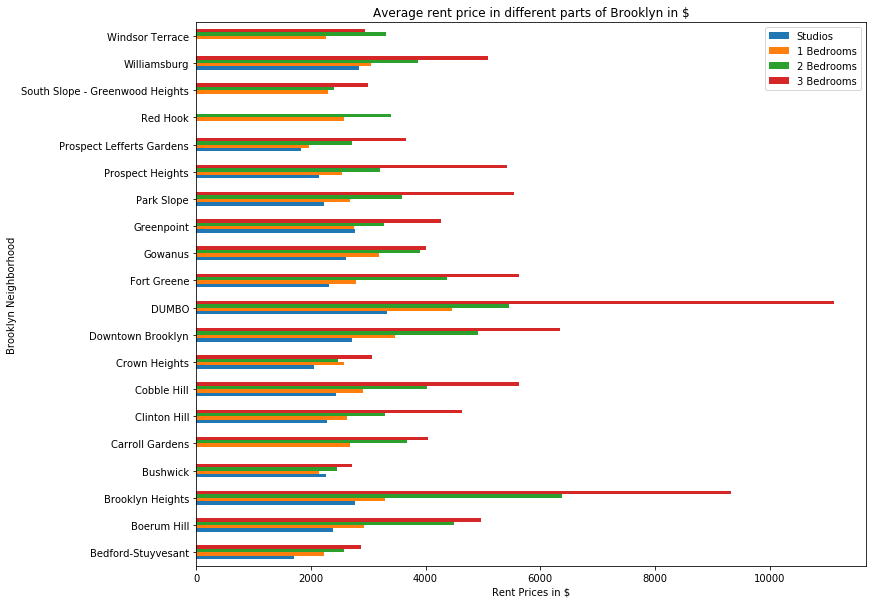

In [19]:
# Now, let's visualize the average rent price for the seven different parts of Brooklyn
ax = df_brooklyn.plot(kind='barh',x='Neighbourhood',stacked=False, figsize=(12,10))
ax.set_title('Average rent price in different parts of Brooklyn in $')
ax.set_ylabel('Brooklyn Neighborhood')
ax.set_xlabel('Rent Prices in $')
plt.show()

In [20]:
df_upman = df.loc[(df["Boroughs"]=="Upper Manhanttan")]
df_upman

,Boroughs,Neighbourhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
29,Upper Manhanttan,East Harlem,2183,2270,3144,3815
30,Upper Manhanttan,Hamilton Heights,1885,2108,2601,3002
31,Upper Manhanttan,Harlem,1793,2323,2981,3500
32,Upper Manhanttan,Inwood,1623,1900,2355,3010
33,Upper Manhanttan,Washington Heights,1669,1939,2423,2842


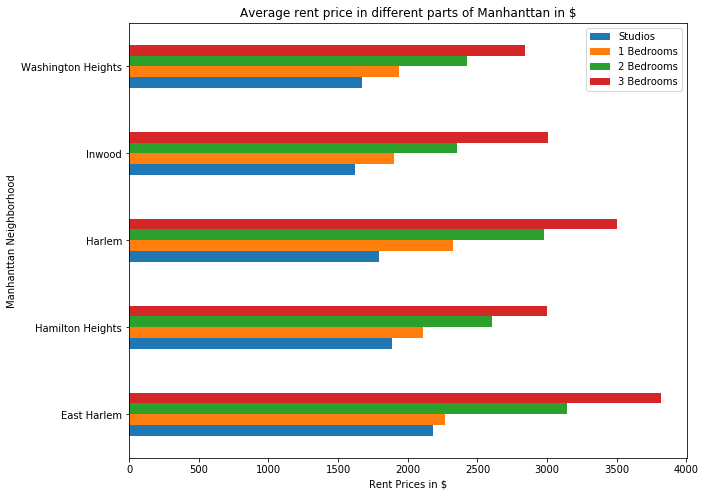

In [68]:
# Now, let's visualize the average rent price for the seven different parts of Manhattan
ax = df_upman.plot(kind='barh',x='Neighbourhood',stacked=False, figsize=(10,8))
ax.set_title('Average rent price in different parts of Manhanttan in $')
ax.set_ylabel('Manhanttan Neighborhood')
ax.set_xlabel('Rent Prices in $')
plt.show()

Summary: 

Based on the needs required for myself, I would think that a studio apartment is most relevant. 

If I were to stay in Upper Manhanttan,Harlem will be my choice based on the cheapest price. 

While if I were to stay in Prospect Lefferts Gardens or Bedford-Stuyvesant. 

Here are the prices summarized below
1. Washington Heights - $1623  

2. Inwood - $1669  

3. Prospect Lefferts Gardens - $1827  

4. Bedford-Stuyvesan - $1700  

From here, I believe the price difference is not as important as other factors such as the venue analysis factors and the location of your job

## Segmenting and Clustering Neighborhoods in New York City

In [21]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [22]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [23]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [24]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [25]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [26]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [27]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,'Neighborhood': neighborhood_name,'Latitude': neighborhood_lat,'Longitude': neighborhood_lon}, ignore_index=True)

In [28]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [29]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
len(neighborhoods['Borough'].unique()),
neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


In [30]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [31]:
# create a map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)

map_newyork

In [32]:
# Get the Brooklyn DataFrame
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [33]:
man_data = neighborhoods[neighborhoods['Borough'] == "Manhattan"].reset_index(drop=True)
man_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


### Let's visualize the 2 locations inside the NYC

In [42]:
address = 'Brooklyn, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [35]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)
    
map_brooklyn

## Define Foursquare Credentials and Version

In [46]:
CLIENT_ID = 'RU14OYBPTHNRHMDLYFAZBNGU5V1SOCGKTFIOJLAOMUXVEOFD' # your Foursquare ID
CLIENT_SECRET = 'NETU43EK3EDV4LB3JVETEABI4L2UL1OXZDFHHWOBHNQSNKDR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: RU14OYBPTHNRHMDLYFAZBNGU5V1SOCGKTFIOJLAOMUXVEOFD
CLIENT_SECRET:NETU43EK3EDV4LB3JVETEABI4L2UL1OXZDFHHWOBHNQSNKDR


Based on the visulization of the map and the rental data, our most accurate information is in the area of Brooklyn. 

Let's consider the two cheapest areas in Brooklyn do a venue analysis for them

1. Prospect Lefferts Gardens - $1827

2. Bedford-Stuyvesan - $1700


In [70]:
df_plg= brooklyn_data.loc[(brooklyn_data["Neighborhood"] == "Prospect Lefferts Gardens")] 
df_plg

neighborhood_latitude = df_plg.iloc[0,2]
neighborhood_longitude = df_plg.iloc[0,3]

print(neighborhood_latitude)
print(neighborhood_longitude)


40.658420017469815
-73.95489867077713


Now, let's get the top 100 venues that are in P.L.G within a radius of 1000 meters.

In [81]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={} &limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RU14OYBPTHNRHMDLYFAZBNGU5V1SOCGKTFIOJLAOMUXVEOFD&client_secret=NETU43EK3EDV4LB3JVETEABI4L2UL1OXZDFHHWOBHNQSNKDR&v=20180605&ll=40.658420017469815,-73.95489867077713&radius=1000 &limit=100'

In [82]:
# Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c7b8a9add57977bd5bd59f0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Prospect Lefferts Gardens',
  'headerFullLocation': 'Prospect Lefferts Gardens, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 142,
  'suggestedBounds': {'ne': {'lat': 40.66742002646983,
    'lng': -73.94305696541402},
   'sw': {'lat': 40.649420008469804, 'lng': -73.96674037614024}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5389f295498e264f18c5d652',
       'name': 'PLG Coffee House and Tavern',
       'location': {'address': '499 Rogers Ave',
        'crossStreet': 'Midwood St',
        'lat': 4

In [83]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [99]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Sincerely Tommy,Boutique,40.686066,-73.944294
1,Bed-Vyne Brew,Bar,40.684751,-73.944319
2,Bed-Vyne Wine & Spirits,Wine Shop,40.684668,-73.944363
3,Anchor Coffee,Coffee Shop,40.684145,-73.941015
4,Peaches HotHouse,Fried Chicken Joint,40.683331,-73.943853


In [85]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Let's explore the second neighbourhood

In [80]:
df_bfs= brooklyn_data.loc[(brooklyn_data["Neighborhood"] == "Bedford Stuyvesant")]
df_bfs

neighborhood_latitude2 = df_bfs.iloc[0,2]
neighborhood_longitude2 = df_bfs.iloc[0,3]

print(neighborhood_latitude2)
print(neighborhood_longitude2)


40.687231607720456
-73.94178488690297


In [86]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={} &limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude2,
    neighborhood_longitude2,
    radius,
LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RU14OYBPTHNRHMDLYFAZBNGU5V1SOCGKTFIOJLAOMUXVEOFD&client_secret=NETU43EK3EDV4LB3JVETEABI4L2UL1OXZDFHHWOBHNQSNKDR&v=20180605&ll=40.687231607720456,-73.94178488690297&radius=1000 &limit=100'

In [91]:
# Send the GET request and examine the results
results = requests.get(url2).json()
results

{'meta': {'code': 200, 'requestId': '5c7b8bfa6a60714c7f185991'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bedford-Stuyvesant',
  'headerFullLocation': 'Bedford-Stuyvesant, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 152,
  'suggestedBounds': {'ne': {'lat': 40.69623161672047,
    'lng': -73.9299380635078},
   'sw': {'lat': 40.678231598720444, 'lng': -73.95363171029813}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5425e79d498e56188b9a5a54',
       'name': 'Sincerely Tommy',
       'location': {'address': '343 Tompkins Ave',
        'lat': 40.686066,
        'lng': -73.944294,
        'labeledLatLngs':

In [92]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [96]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Sincerely Tommy,Boutique,40.686066,-73.944294
1,Bed-Vyne Brew,Bar,40.684751,-73.944319
2,Bed-Vyne Wine & Spirits,Wine Shop,40.684668,-73.944363
3,Anchor Coffee,Coffee Shop,40.684145,-73.941015
4,Peaches HotHouse,Fried Chicken Joint,40.683331,-73.943853


In [94]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Using Machine Learning to cluster venues in the neighourhoods

### Using k clustering for venue analysis 

In [101]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [102]:
brooklyn_bfsvenues = getNearbyVenues(names=df_bfs['Neighborhood'],
                                   latitudes=df_bfs['Latitude'],
                                   longitudes=df_bfs['Longitude']
                                  )

Bedford Stuyvesant


In [106]:
print(brooklyn_bfsvenues.shape)
brooklyn_bfsvenues

(100, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bedford Stuyvesant,40.687232,-73.941785,Sincerely Tommy,40.686066,-73.944294,Boutique
1,Bedford Stuyvesant,40.687232,-73.941785,Bed-Vyne Brew,40.684751,-73.944319,Bar
2,Bedford Stuyvesant,40.687232,-73.941785,Bed-Vyne Wine & Spirits,40.684668,-73.944363,Wine Shop
3,Bedford Stuyvesant,40.687232,-73.941785,Anchor Coffee,40.684145,-73.941015,Coffee Shop
4,Bedford Stuyvesant,40.687232,-73.941785,Peaches HotHouse,40.683331,-73.943853,Fried Chicken Joint
5,Bedford Stuyvesant,40.687232,-73.941785,Eugene & Co,40.683899,-73.944023,New American Restaurant
6,Bedford Stuyvesant,40.687232,-73.941785,Lover's Rock,40.683061,-73.943618,Bar
7,Bedford Stuyvesant,40.687232,-73.941785,Herbert Von King Park,40.689514,-73.946507,Park
8,Bedford Stuyvesant,40.687232,-73.941785,Royal Rib House,40.682893,-73.940742,BBQ Joint
9,Bedford Stuyvesant,40.687232,-73.941785,Bed-Vyne Cocktail,40.682874,-73.940648,Cocktail Bar


In [110]:
brooklyn_bfsvenues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Arepa Restaurant,1,1,1,1,1,1
Art Gallery,1,1,1,1,1,1
BBQ Joint,1,1,1,1,1,1
Bagel Shop,1,1,1,1,1,1
Bakery,1,1,1,1,1,1
Bar,6,6,6,6,6,6
Boutique,1,1,1,1,1,1
Café,8,8,8,8,8,8
Caribbean Restaurant,4,4,4,4,4,4


In [116]:
# one hot encoding
brooklyn_bfsonehot = pd.get_dummies(brooklyn_bfsvenues[['Venue']], prefix="", prefix_sep="")

# add venue category column back to dataframe
brooklyn_bfsonehot['Venue Category'] = brooklyn_bfsvenues['Venue Category'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_bfsonehot.columns[-1]] + list(brooklyn_bfsonehot.columns[:-1])
brooklyn_bfsonehot = brooklyn_bfsonehot[fixed_columns]

brooklyn_bfsonehot.head()

,Venue Category,2 Baci Pizzeria,462 Halsey Community Garden,7-Eleven,A & A Bake & Doubles,A Gusto Bakery Cafe Wine Bar,American Medium,Amigo grocery,Anchor Coffee,Angela’s,...,The Meat Market Brooklyn,Tree House Bk,UnWine Bed Stuy,Veggies Natural Juice Bar & Cafe,Vin de Table,Warude,Willoughby General,Wine-O,Wing Cheong,Zaca Cafe
0,Boutique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wine Shop,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Coffee Shop,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Fried Chicken Joint,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
brooklyn_bfsonehot.shape

(100, 101)

In [119]:
brooklyn_bfsgrouped = brooklyn_bfsonehot.groupby('Venue Category').mean().reset_index()
brooklyn_bfsgrouped

,Venue Category,2 Baci Pizzeria,462 Halsey Community Garden,7-Eleven,A & A Bake & Doubles,A Gusto Bakery Cafe Wine Bar,American Medium,Amigo grocery,Anchor Coffee,Angela’s,...,The Meat Market Brooklyn,Tree House Bk,UnWine Bed Stuy,Veggies Natural Juice Bar & Cafe,Vin de Table,Warude,Willoughby General,Wine-O,Wing Cheong,Zaca Cafe
0,Arepa Restaurant,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
1,Art Gallery,0.0,0.0,0.0,0.00,0.000,1.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
2,BBQ Joint,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
3,Bagel Shop,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
4,Bakery,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
5,Bar,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
6,Boutique,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
7,Café,0.0,0.0,0.0,0.00,0.125,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.125
8,Caribbean Restaurant,0.0,0.0,0.0,0.25,0.000,0.0,0.000000,0.000000,0.25,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000
9,Chinese Restaurant,0.0,0.0,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.000


In [120]:
# Check the shape of our DataFrame
brooklyn_bfsgrouped.shape

(52, 101)

In [121]:
# set number of clusters
kclusters = 4

brooklynb_bfsgrouped_clustering = brooklyn_bfsgrouped.drop('Venue Category', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklynb_bfsgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0], dtype=int32)

In [124]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [127]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue Category']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Venue Category'] = brooklyn_bfsgrouped['Venue Category']

for ind in np.arange(brooklyn_bfsgrouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_bfsgrouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arepa Restaurant,Guacuco,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
1,Art Gallery,American Medium,Zaca Cafe,Green Gourmet Market,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co
2,BBQ Joint,Royal Rib House,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
3,Bagel Shop,Nagle's Bagels,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
4,Bakery,Saraghina Bakery,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill


In [131]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [130]:
# final venue table with analysis 
venues_sorted

,Cluster Labels,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Arepa Restaurant,Guacuco,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
1,0,Art Gallery,American Medium,Zaca Cafe,Green Gourmet Market,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co
2,0,BBQ Joint,Royal Rib House,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
3,0,Bagel Shop,Nagle's Bagels,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
4,0,Bakery,Saraghina Bakery,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
5,0,Bar,Lover's Rock,Bar Lunatico,Fulton Ale House,The Bar at Saraghina,Bed-Vyne Brew,"Captain Dan's ""Good Time"" Tavern",American Medium,Amigo grocery,Crocus Coffee,Deals
6,3,Boutique,Sincerely Tommy,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
7,0,Café,Zaca Cafe,Bedstuy Provisions,Georges-André Vintage Café,Brown Butter,Skål,Sumner Cafe & Wine Bar,Le Paris Dakar (Fulton),A Gusto Bakery Cafe Wine Bar,Cozy Coffee,Deals
8,0,Caribbean Restaurant,Tastee Pattee,A & A Bake & Doubles,Kafe Louverture,Angela’s,Zaca Cafe,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen
9,0,Chinese Restaurant,Wing Cheong,New Hardee Chinese Restaurant,Green Gourmet Market,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co


In [133]:
venues_sorted.loc[venues_sorted['Cluster Labels'] == 0, venues_sorted.columns[[1] + list(range(2, venues_sorted.shape[1]))]]

,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arepa Restaurant,Guacuco,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
1,Art Gallery,American Medium,Zaca Cafe,Green Gourmet Market,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co
2,BBQ Joint,Royal Rib House,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
3,Bagel Shop,Nagle's Bagels,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
4,Bakery,Saraghina Bakery,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill
5,Bar,Lover's Rock,Bar Lunatico,Fulton Ale House,The Bar at Saraghina,Bed-Vyne Brew,"Captain Dan's ""Good Time"" Tavern",American Medium,Amigo grocery,Crocus Coffee,Deals
7,Café,Zaca Cafe,Bedstuy Provisions,Georges-André Vintage Café,Brown Butter,Skål,Sumner Cafe & Wine Bar,Le Paris Dakar (Fulton),A Gusto Bakery Cafe Wine Bar,Cozy Coffee,Deals
8,Caribbean Restaurant,Tastee Pattee,A & A Bake & Doubles,Kafe Louverture,Angela’s,Zaca Cafe,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen
9,Chinese Restaurant,Wing Cheong,New Hardee Chinese Restaurant,Green Gourmet Market,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co
10,Cocktail Bar,Bed-Vyne Cocktail,The Corners,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill


## Cluster 1: Mostly food and drinks places 

In [134]:
venues_sorted.loc[venues_sorted['Cluster Labels'] == 1, venues_sorted.columns[[1] + list(range(2, venues_sorted.shape[1]))]]

,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Historic Site,Do The Right Thing Crossing,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill,Eugene & Co


## Cluster 2: Historic Site 

In [135]:
venues_sorted.loc[venues_sorted['Cluster Labels'] == 2, venues_sorted.columns[[1] + list(range(2, venues_sorted.shape[1]))]]

,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Dog Run,Herbert Von King Park Dog Run,Zaca Cafe,Georges-André Vintage Café,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill


## Cluster 3: Dog Run 

In [136]:
venues_sorted.loc[venues_sorted['Cluster Labels'] == 3, venues_sorted.columns[[1] + list(range(2, venues_sorted.shape[1]))]]

,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Boutique,Sincerely Tommy,Zaca Cafe,Fulton Ale House,Cinnamon Girl,Cozy Coffee,Crocus Coffee,Deals,Do The Right Thing Crossing,Doctors Cave Cafe Kitchen,El Jeffe - Modern Mexican Grill


## Cluster 4: Boutique Shop

#### Similar analysis can be done for Prospect Lefferts Gardens for comparision

## In Summary

K-means will partition Bedford Stuyvesant,Brooklyn into mutually exclusive groups, in our example, into 4 clusters. The venues in each cluster are similar to each other. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 4 clusters can be:

Cluster 1 : Mostly food and drinks places  
Cluster 2 : Historic Site   
Cluster 3 : Dog Run  
Cluster 4 : Boutique Shop  




#### Analysis of Results

We have used data science to determine which neighborhoods in NYC is good to move into. 

In terms of prices, we have considered Upper Manhattan and Brooklyn. 

However, based on the most accuracate dataset we have, we have decided to explore Brooklyn further. 


From brooklyn, we went deeper to find out that Bedford Stuyvesant and Prospect Lefferts Gardens are relatively cheaper than the rest.   

We went on to do a venue analysis using foursquare API. 

Bedford Stuyvesant has good clusters of food and drinks which is quite ideal. 

What other information can we have to improve this further? 

1. Diversity of people

2. Schools

3. Proximity to good transport.